In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
import chainer
import chainer.functions as F

In [253]:
z1, z2 = np.random.randn(2, 10, 100).astype(np.float32)
t = np.arccos(np.sum(z1 * z2, axis=1) / (np.linalg.norm(z1, axis=1) * np.linalg.norm(z2, axis=1))).reshape(-1, 1)
print(t[0])
z3 = np.sin((1 - 0.5) * t) / np.sin(t) * z1 + np.sin(0.5 * t) / np.sin(t) * z2
print(z3[0, 0])

z1 = chainer.Variable(z1)
z2 = chainer.Variable(z2)
t = F.arccos(F.sum(z1 * z2, axis=1) / (F.sqrt(F.batch_l2_norm_squared(z1)) * F.sqrt(F.batch_l2_norm_squared(z2))))
t = F.reshape(t, (-1, 1))
print(t[0])
z3 = F.sin(0.5*t) / F.sin(t) * z1 + F.sin(0.5*t) / F.sin(t) * z2
z3[0, 0]

[1.425588]
-0.6587573
variable([1.425588])


variable(-0.6587573)

In [82]:
def linerp(x1, x2, m):
    return x1 + (x2 - x1)*m

def spherp(x1, x2, m):
    θ = np.arccos(np.dot(x1/np.linalg.norm(x1), x2/np.linalg.norm(x2)))
    return np.sin((1 - m)*θ) / np.sin(θ) * x1 + np.sin(m*θ) / np.sin(θ) * x2

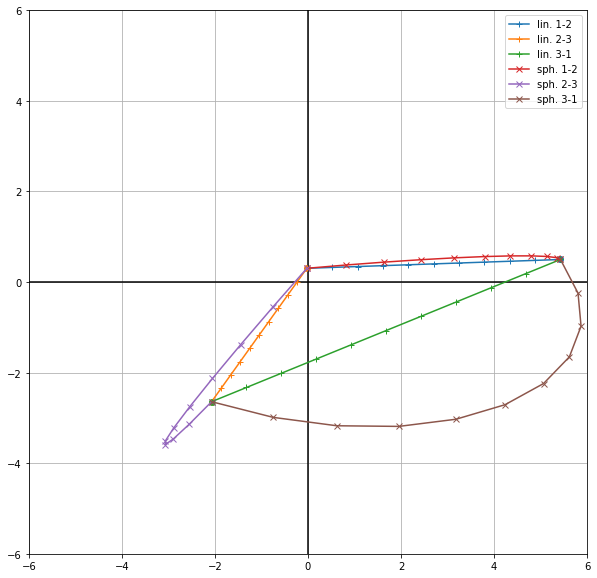

In [81]:
z1 = np.random.normal(scale=3.0, size=2)
z2 = np.random.normal(scale=3.0, size=2)
z3 = np.random.normal(scale=3.0, size=2)

z12_linerp = np.array([linerp(z1, z2, m) for m in np.arange(0, 1.1, 0.1)])
z23_linerp = np.array([linerp(z2, z3, m) for m in np.arange(0, 1.1, 0.1)])
z31_linerp = np.array([linerp(z3, z1, m) for m in np.arange(0, 1.1, 0.1)])

z12_spherp = np.array([spherp(z1, z2, m) for m in np.arange(0, 1.1, 0.1)])
z23_spherp = np.array([spherp(z2, z3, m) for m in np.arange(0, 1.1, 0.1)])
z31_spherp = np.array([spherp(z3, z1, m) for m in np.arange(0, 1.1, 0.1)])

plt.figure(figsize=(10, 10))
plt.scatter(*z1)
plt.scatter(*z2)
plt.scatter(*z3)

plt.plot(z12_linerp[:,0], z12_linerp[:,1], marker='+', label='lin. 1-2')
plt.plot(z23_linerp[:,0], z23_linerp[:,1], marker='+', label='lin. 2-3')
plt.plot(z31_linerp[:,0], z31_linerp[:,1], marker='+', label='lin. 3-1')

plt.plot(z12_spherp[:,0], z12_spherp[:,1], marker='x', label='sph. 1-2')
plt.plot(z23_spherp[:,0], z23_spherp[:,1], marker='x', label='sph. 2-3')
plt.plot(z31_spherp[:,0], z31_spherp[:,1], marker='x', label='sph. 3-1')

plt.vlines([0], -100, 100)
plt.hlines([0], -100, 100)

lim = np.ceil(np.abs([z12_spherp, z23_spherp, z31_spherp]).max()).astype(int)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.grid()
plt.legend()
plt.show()